# Mapa de COVID19 -datos del 26 de abril

Este es un tutorial para hacer hacer mapas de COVID19. Si quieres aprender a hacer mapas en R con tidyverse, te recomiendo el tutorial
del Dr. Patricio Esteves en https://github.com/prestevez/covid-19-mx-map/blob/master/new_map.R

In [1]:
#El primer paso para hacer un mapa es tener un archivo .shp con el que se pueda hacer georeferenciación de los datos
#que quieres mapear. Del tutorial del Dr. Esteves puedes encontrar uno muy bueno a nivel municipal en la la liga:
#https://github.com/prestevez/covid-19-mx-map/raw/master/datos_covid/01_32_mun.zip

#Cargamos el paquete
import geopandas as gpd


#https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [2]:
#También cargamos matplotlib
import matplotlib.pyplot as plt

In [3]:
#Cargamos la dirección de nuestro shapefile. Es necesario que tengas todos los archivos de shapefile
#No basta con tener sólo el archivo cuya extensión .shp
shapefile = 'C:/Users/Ramiro Antonio/Dropbox/Otras cosas/COVID19/01_32_mun.shp'

#Luego leemos el shapefile con geopandas
geodf = gpd.read_file(shapefile)

In [4]:
#Exploramos el shapefile
geodf.head(3)

#Observamos que tenemos cinco columnas. CLave_Georefenciada (conformado por la concatenación de entidad y munc)
#Clave_entd, clave_mun, NomGEO y geometry (dato de polígono y coordenadas)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."


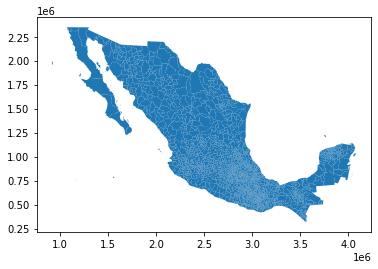

In [5]:
#Verificamos que sea un mapa. 
geodf.plot()

#Felicidades, tienes un mapa

In [6]:
#Ya tenemos nuestro shapefile. Ahora necesitamos el segundo archivo en donde está la info que queremos unir
import pandas as pd

#converter te ayuda a mantener los 0
df = pd.read_csv("C:/Users/Ramiro Antonio/Dropbox/Otras cosas/COVID19/200426COVID19MEXICO.csv",
                encoding='latin-1') #como tiene acentos, recuerda ponerle el encoding para que lea el csv

#Tip. En caso de que tuvieras la clave y empezara con cero, para que al subirla con python no se pierdan los "Leading zeros"
#usa este código
#df = pd.read_csv("C:/Users/Ramiro Antonio/Dropbox/Otras cosas/COVID19/200426COVID19MEXICO.csv",
#                encoding='latin-1', converters={'NOMBRE_VARIABLE': lambda x: str(x)}


#Nos interesa ver todas las columns, por lo que le decimos a los pandas que los muestren
pd.set_option('display.max_columns', 99)

In [7]:
df.head(4)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,26/04/2020,3.10E+58,1,4,9,2,9,9,16,2,17/04/2020,16/04/2020,9999-99-99,2,2,52,1,97,2,1,1,2,2,1,2,2,2,1,2,99,2,99,MÃ©xico,99,2
1,26/04/2020,0a9147,2,12,26,1,26,26,30,1,30/03/2020,18/03/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97
2,26/04/2020,0f671b,2,12,5,2,5,5,30,1,09/04/2020,06/04/2020,9999-99-99,97,2,24,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97
3,26/04/2020,15f384,2,12,25,1,25,2,5,2,06/04/2020,24/03/2020,9999-99-99,2,1,76,1,2,2,1,2,2,2,1,2,2,2,2,2,99,2,99,MÃ©xico,99,2


In [8]:
#Verficamos también la información contenida en el df
df.info()

#Tenemos un data frame con 67634 obs y 25 columnnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67635 entries, 0 to 67634
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FECHA_ACTUALIZACION  67635 non-null  object
 1   ID_REGISTRO          67635 non-null  object
 2   ORIGEN               67635 non-null  int64 
 3   SECTOR               67635 non-null  int64 
 4   ENTIDAD_UM           67635 non-null  int64 
 5   SEXO                 67635 non-null  int64 
 6   ENTIDAD_NAC          67635 non-null  int64 
 7   ENTIDAD_RES          67635 non-null  int64 
 8   MUNICIPIO_RES        67635 non-null  int64 
 9   TIPO_PACIENTE        67635 non-null  int64 
 10  FECHA_INGRESO        67635 non-null  object
 11  FECHA_SINTOMAS       67635 non-null  object
 12  FECHA_DEF            67635 non-null  object
 13  INTUBADO             67635 non-null  int64 
 14  NEUMONIA             67635 non-null  int64 
 15  EDAD                 67635 non-null  int64 
 16  NACI

In [9]:
#Verificamos los null
df.isnull().sum()

#No hay valores nulos en nuestra base de datos. Muy bien Salud!

FECHA_ACTUALIZACION    0
ID_REGISTRO            0
ORIGEN                 0
SECTOR                 0
ENTIDAD_UM             0
SEXO                   0
ENTIDAD_NAC            0
ENTIDAD_RES            0
MUNICIPIO_RES          0
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
RESULTADO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0
UCI                    0
dtype: int64

Mapa estático

In [10]:
#Unir los mapas de datos

#Hay que hacer una variable en la que coincida en ambos df
#En geodf está CVEGEO (clave estado + clave munip)

#Creamos una variable así en el df.
#Desde excel se puede hacer concatenando las variables de ENTIDAD_UM y MUNICIPIO_RES
#las cuales previamente se tuvieorn que haber pasado a un formato de =+TEXTO(J2,"00") para entidad
#y =+TEXTO(L2,"000") para municipio. lo explican en este link https://exceltotal.com/como-quitar-o-poner-ceros-la-izquierda-en-excel/

#Desde python tiene que seguirse el siguiente proceso:

# 1) Creas dos variables nuevas cambiando el formato a string y asegurándote que tengan 2 cifras en entidad y 3 en municp
df["CVE_ENT"] = [str("{:>02}".format(number)) for number in df.ENTIDAD_UM]
df["CVE_MUN"] = [str("{:>03}".format(number)) for number in df.MUNICIPIO_RES]

# 2) Concatenas ambas variables en una clave, que será la que unirás al geodf
df["CVEGEO"] = df["CVE_ENT"] + df["CVE_MUN"] 
df.head(3)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CVE_ENT,CVE_MUN,CVEGEO
0,26/04/2020,3.10E+58,1,4,9,2,9,9,16,2,17/04/2020,16/04/2020,9999-99-99,2,2,52,1,97,2,1,1,2,2,1,2,2,2,1,2,99,2,99,MÃ©xico,99,2,09,016,09016
1,26/04/2020,0a9147,2,12,26,1,26,26,30,1,30/03/2020,18/03/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97,26,030,26030
2,26/04/2020,0f671b,2,12,5,2,5,5,30,1,09/04/2020,06/04/2020,9999-99-99,97,2,24,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97,05,030,05030


In [11]:
#Arreglamos el dataframe para que nos dé el agregado
df_ = df.groupby(["CVEGEO", "CVE_ENT", "CVE_MUN"]).count().sort_values(by="ID_REGISTRO", ascending=False).reset_index()
df_.head(5)

,CVEGEO,CVE_ENT,CVE_MUN,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,09007,09,007,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925
1,09005,09,005,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722
2,19039,19,039,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626
3,11020,11,020,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568
4,14039,14,039,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395


In [12]:
#Mergeamos df_ con geodf

#Para una bunna guía de merge: https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/

#Es importante que a geodf se le pegue el otro mapa, dado que eso hace que mantenga su .shp.
#Left_on es la variable del geodf, right_on es la del .csv

#merged = geodf.merge(df_, left_on = "CVEGEO", right_on = "CVEGEO_")
#merged.head(4)

#Vamos a intentar otro tipo de merge para conservar todas las observaciones del geomapa! BIEN
left_merged = pd.merge(geodf, df_, on="CVEGEO", how="left")

#Lo ordenamos por contagios(que puede ser cualquier variable)
left_merged.sort_values(by="ORIGEN", ascending=False, inplace=True)
left_merged.tail(3)

,CVEGEO,CVE_ENT_x,CVE_MUN_x,NOMGEO,geometry,CVE_ENT_y,CVE_MUN_y,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
2437,32033,32,033,Moyahua de Estrada,"POLYGON ((2374490.807 1036859.485, 2374598.825...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2447,32043,32,043,Susticacán,"POLYGON ((2380950.197 1185493.432, 2381020.806...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,32052,32,052,Villa García,"POLYGON ((2503561.579 1134358.782, 2506009.344...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Replace NAN es 0.
left_merged.fillna(0, inplace=True)
left_merged.tail(3)

,CVEGEO,CVE_ENT_x,CVE_MUN_x,NOMGEO,geometry,CVE_ENT_y,CVE_MUN_y,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
2437,32033,32,033,Moyahua de Estrada,"POLYGON ((2374490.807 1036859.485, 2374598.825...",0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2447,32043,32,043,Susticacán,"POLYGON ((2380950.197 1185493.432, 2381020.806...",0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2456,32052,32,052,Villa García,"POLYGON ((2503561.579 1134358.782, 2506009.344...",0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Verificamos que no haya municipios repetidos
left_merged.CVEGEO.value_counts().sort_values()

16010    1
23007    1
05003    1
19016    1
32031    1
        ..
26049    1
20107    1
28022    1
30157    1
21213    1
Name: CVEGEO, Length: 2463, dtype: int64

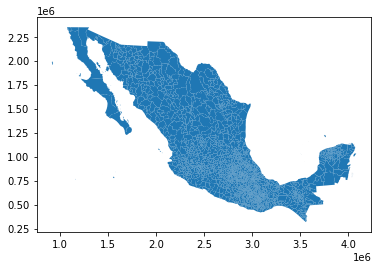

In [16]:
#Finalmente, vemos que es un mapa sin espacios libres
left_merged.plot()

In [22]:
#Cambiar rangos
import mapclassify

Text(0.1, 0.17, 'Source: Secretaría de Salud, Mx')

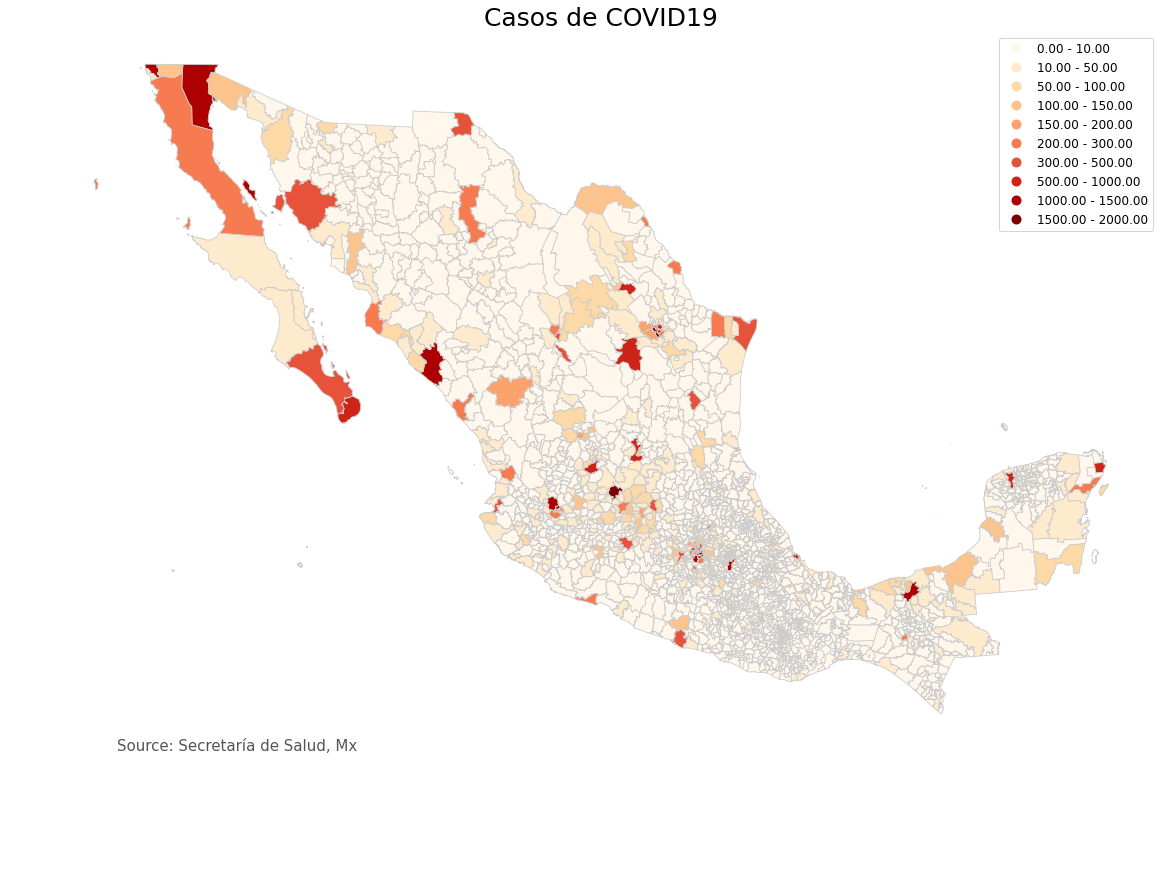

In [66]:
#Estamos listos para hacer el mapa

#Leyenda
plt.rc('legend',fontsize=40) # using a size in points
plt.rc('legend',fontsize='large') # using a named size

#variable
variable = "ORIGEN"  #aqui la variable no cuenta tanto porque es un conteo agrupado que te da el total de enfermos,
#podemos usar cualquier variable

#set the range
vmin, vmax = 0, 2000

#create figure and axes
fig, ax = plt.subplots(1, figsize=(20, 20))


#create map
#world.plot(column='gdp_per_cap', cmap='OrRd', scheme='user_defined', classification_kwds={'bins':[1000, 10000, 100000]})
#https://geopandas.org/mapping.html

left_merged.plot(column=variable, cmap='OrRd', legend=True, linewidth=0.8, ax=ax, edgecolor="0.8", scheme="user_defined",
                classification_kwds={'bins':[10, 50, 100, 150, 200, 300, 500, 1000,1500, 2000]})
ax.axis("off")

#para buscar colores: https://matplotlib.org/tutorials/colors/colormaps.html


#add a title
ax.set_title("Casos de COVID19", fontdict={"fontsize":"25", "fontweight":3})

ax.annotate("Source: Secretaría de Salud, Mx", xy=(0.1,0.17), xycoords="figure fraction",
           horizontalalignment="left", verticalalignment="top", fontsize=15, COLOR="#555555")

#Crea color bar
#sm= plt.cm.ScalarMappable(cmap = "Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm._A = []

#cbar=fig.colorbar(sm)

In [67]:
#Para salvar el mapa
fig.savefig("mapa_covid.png", dpi=300)